# Unsupervised learning

    Unsupervised learning is the training of machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. 

    Here the task of machine is to group unsorted information according to similarities, patterns and differences without any prior training of data.

    Unlike supervised learning, no teacher is provided that means no training will be given to the machine. Therefore machine is restricted to find the hidden structure in unlabeled data by our-self.

## Unsupervised learning classified into two categories of algorithms:

    1. Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.

    2. Association:An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.
    
### K- Means algo
     
      1.generate random mean values
      
      2.calculate the nearest values and form cluster
      
      3.from clusters formed again find mean value and form cluster again
      
      4.repeat the step 3 and 4 till you get the same values again
      
#### ADVANTAGES:

    1. It gives good results
    2. It is already implemented in the software
    3. Number of clusters has to be fixed before
    4. Dependent of the initialisation parameters and the chosen distance

#### DISADVANTAGES:
    
    1.The results given are usually dependent on the initial values for the means.
    
    2.And the way to initialise the means is not specified, one can start by randomly choosing K of the samples
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#creating dataset for our analysis
m1, cov1 = [9, 8], [[1.5, 2], [1, 2]]
m2, cov2 = [5, 13], [[2.5, -1.5], [-1.5, 1.5]]
m3, cov3 = [3, 7], [[0.25, 0.5], [-0.1, 0.5]]

data1 = np.random.multivariate_normal(m1, cov1, 250)
data2 = np.random.multivariate_normal(m2, cov2, 180)
data3 = np.random.multivariate_normal(m3, cov3, 100)

X = np.vstack((data1,np.vstack((data2,data3))))

np.random.shuffle(X)

/home/hardik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  
/home/hardik/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


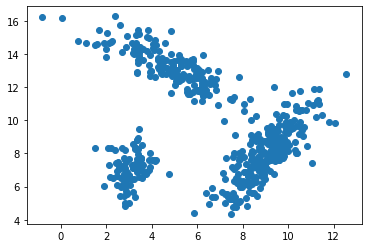

In [5]:
plt.scatter(X[:,0],X[:,1])

In [6]:
def kmeans(x,k,max_iters=40):
    #generating random mean values
    ind=np.random.choice(np.arange(len(x)),k)
    centroid=x[ind,:]
    print("random generated ind:",ind)
    print("random generated centroids:",centroid)
    for i in range(max_iters):
        center=np.asarray([np.argmin([np.dot(x1-c,x1-c)for c in centroid])for x1 in x ])
        centroid=[x[center==i].mean(axis=0) for i in range(k)]
    print("center:",center)
    print("centroid:",centroid)
    return np.array(centroid),center

In [9]:
def show(x,c,centroid,keep=False):
    plt.plot(x[c == 0, 0], x[c == 0, 1], '*b',
         x[c == 1, 0], x[c == 1, 1], '*r',
         x[c == 2, 0], x[c == 2, 1], '*g')
    plt.plot(centroid[:,0],centroid[:,1],'*m',markersize=20)
    if keep :
        plt.ioff()
        plt.show()

random generated ind: [ 55 523 437]
random generated centroids: [[ 2.30778172  6.53372273]
 [ 4.1556056  14.85544529]
 [ 3.41989127  6.56716454]]
center: [2 1 1 2 1 0 1 0 2 1 2 0 0 1 2 1 2 1 2 0 0 1 1 2 2 2 0 0 1 1 2 1 1 2 2 2 2
 2 1 1 2 0 2 1 1 1 0 0 0 2 2 2 2 0 1 0 2 0 2 2 2 1 2 2 2 1 2 0 2 2 1 1 2 0
 2 0 2 1 1 0 1 1 2 1 1 2 1 0 1 2 2 1 2 2 1 1 1 1 0 1 2 2 2 2 1 1 0 2 1 2 1
 1 1 0 0 0 2 2 0 2 2 2 1 2 2 0 2 2 0 2 2 1 0 2 2 0 2 2 0 0 1 2 1 2 2 1 2 0
 2 2 2 2 1 1 1 1 0 1 1 2 0 2 0 1 2 2 2 0 2 1 0 1 1 2 1 0 2 1 1 2 2 2 2 2 2
 1 1 2 1 2 2 1 1 1 2 1 1 0 1 0 1 1 0 2 2 2 1 0 2 0 2 2 1 1 2 1 2 2 0 2 2 0
 2 2 2 2 1 1 0 1 2 2 0 1 0 0 2 1 2 1 1 0 0 2 1 1 2 1 2 1 1 1 2 1 2 1 1 2 2
 2 0 2 1 1 2 1 2 0 0 2 2 1 2 1 2 1 2 2 1 2 1 0 1 1 1 0 0 1 2 2 1 1 1 0 2 0
 2 2 1 2 1 1 1 2 0 2 2 2 2 0 2 1 2 2 2 2 2 2 2 2 0 2 2 1 1 0 1 1 2 2 2 2 0
 2 2 1 2 0 1 1 0 1 0 1 0 2 2 2 2 0 1 2 2 2 2 1 2 1 0 1 2 2 1 0 2 2 2 1 2 1
 2 1 0 1 0 1 2 0 0 2 1 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2 1 0 1 2 1 2 2 1 0 2
 1 2 2 0 1 1 1 0 2 0 

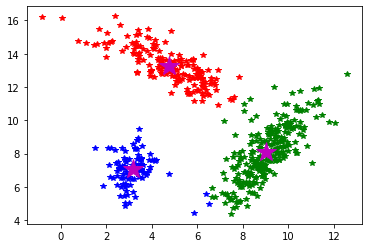

In [12]:
centroid,center=kmeans(X,k=3)
show(X,center,centroid)